In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data= pd.read_csv("sampled_df.csv")
data.head(10)

,title,year,director,actors,rating,runtime,genre,release_date,plot_summary,words_movies,headline,category,short_description,authors,date,words_news
0,The SpongeBob Movie: Sponge Out of Water,2015,"Directors:Paul Tibbitt, Mike Mitchell","Tom Kenny, Antonio Banderas, Bill Fagerbakke, ...",6.0,92,Animation,2/6/2015,When a diabolical pirate above the sea steals ...,diabolical pirate sea steals secret formula ne...,Fighting the New Stupidity,"Keith M. Parsons, ContributorPhilosopher, hist...",Vaccines are a great triumph of the human inte...,Vaccines are a great triumph of the human inte...,2/6/2015,Vaccines great triumph human intellect ancient...
1,Entourage,2015,Doug Ellin,"Adrian Grenier, Kevin Connolly, Jerry Ferrara,...",6.5,104,Comedy,7/18/2015,Film star Vince Chase navigates the vapid terr...,navigates vapid terrain close circle friends t...,Harper Lee's 'Watchmen' Infused With Religious...,"Cathy Lynn Grossman, Religion News Service",(RNS) Harper Lee’s “new” book “Go Set a Watchm...,(RNS) Harper Lee’s “new” book “Go Set a Watchm...,7/18/2015,new book Go infused religious life Christian m...
2,Baywatch,2017,Seth Gordon,"Dwayne Johnson, Zac Efron, Alexandra Daddario,...",5.5,116,Action,5/25/2017,Devoted lifeguard Mitch Buchannon butts heads ...,Devoted lifeguard butts heads brash new recrui...,39 Tweets That Capture How Much Parents Love Wine,Caroline Bologna,Happy National Wine Day!,Happy National Wine Day!,5/25/2017,Happy
3,Mute,2018,Duncan Jones,"Alexander Skarsgård, Paul Rudd, Justin Theroux...",5.4,126,Mystery,2/23/2018,A mute bartender goes up against his city's ga...,mute bartender goes city gangsters effort find...,"Despite Attacking Renewables, Trump Team Says ...",Chris D'Angelo,"""As long as it’s made in America, I’m good wit...","""As long as it’s made in America, I’m good wit...",2/23/2018,As long made ’m good said
4,Honeymoon,2014,Leigh Janiak,"Rose Leslie, Harry Treadaway, Ben Huber, Hanna...",5.7,87,Drama,9/12/2014,A newlywed couple finds their lake-country hon...,newlywed couple finds lake country honeymoon d...,"Golf Teacher Admits To Molesting Kids, Trying ...",Ed Mazza,NaN,NaN,9/12/2014,NaN
5,Split,2016,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3,117 min,"Horror, Thriller",1/20/2017,Three girls are kidnapped by a man with a diag...,girls kidnapped man diagnosed distinct persona...,Newspaper Front Pages Usher In Uncertainty Of ...,Willa Frej,"""We have no idea what this guy's gonna do,"" on...","""We have no idea what this guy's gonna do,"" on...",1/20/2017,have idea guy gon do cover reads
6,Scooby-Doo! WrestleMania Mystery,2014,"Brandon Vietti, Seung-goo Jo, Young Won Jung, ...","Frank Welker, Mindy Cohn, Grey Griffin, Matthe...",7.4,84 min,"Animation, Comedy, Family, Mystery",3/25/2014,Shaggy and Scooby win tickets for a WWE City t...,win tickets trip go there attacked huge monste...,Gillian Georges: A Bar Star on the Rise,"Jose Martinez, Contributor\nJose Martinez is a...",Determined to eventually open her own restaura...,Determined to eventually open her own restaura...,3/25/2014,Determined eventually open own restaurant mayb...
7,Scooby-Doo! Music of the Vampire,2012,David Block,"Frank Welker, Matthew Lillard, Grey Griffin, M...",7.8,79 min,"Family, Animation, Mystery, Adventure, Comedy,...",3/13/2012,When Daphne becomes the star of a vampire film...,becomes star vampire film production thrown ch...,Do You Eat When You're Bored?,"Irene Rubaum-Keller, Contributor\nAuthor, Mili...","If you eat when you're bored, you are not alon...","If you eat when you're bored, you are not alon...",3/13/2012,eat bored alone Eating fun pleasure do procras...
8,The Rewrite,2014,Marc Lawrence,"Hugh Grant, Whit Baldwin, Vanessa Wasche",6.0,107 min,"Romance, Comedy",2/13/2015,An Oscar-winning writer in a slump leaves Holl...,Oscar winning writer slump leaves teach screen...,"Health Is Progress, Not Perfection","Erin Bahadur, Contributorrecovering addict, cr...","For me, health means much more

In [3]:
data_sub= data[["year", "runtime", "rating"]]
data_sub.head(10)

,year,runtime,rating
0,2015,92,6.0
1,2015,104,6.5
2,2017,116,5.5
3,2018,126,5.4
4,2014,87,5.7
5,2016,117 min,7.3
6,2014,84 min,7.4
7,2012,79 min,7.8
8,2014,107 min,6.0
9,2014,22 min,7.0


In [4]:
# Function to check for non-numeric values in a column
def has_non_numeric(column):
    return any(pd.to_numeric(column, errors='coerce').isna())

# Check each column for non-numeric data
for column in data_sub.columns:
    if has_non_numeric(data[column]):
        print(f"'{column}' contains non-numeric data.")

'runtime' contains non-numeric data.


In [5]:
# Remove "min" and retain only numbers
data_sub['runtime'] = data_sub['runtime'].str.replace(r'\D', '', regex=True)

# Display the modified DataFrame
data_sub.head(10)

C:\Users\asuri\AppData\Local\Temp\ipykernel_34060\1504430416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['runtime'] = data_sub['runtime'].str.replace(r'\D', '', regex=True)


,year,runtime,rating
0,2015,92,6.0
1,2015,104,6.5
2,2017,116,5.5
3,2018,126,5.4
4,2014,87,5.7
5,2016,117,7.3
6,2014,84,7.4
7,2012,79,7.8
8,2014,107,6.0
9,2014,22,7.0


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


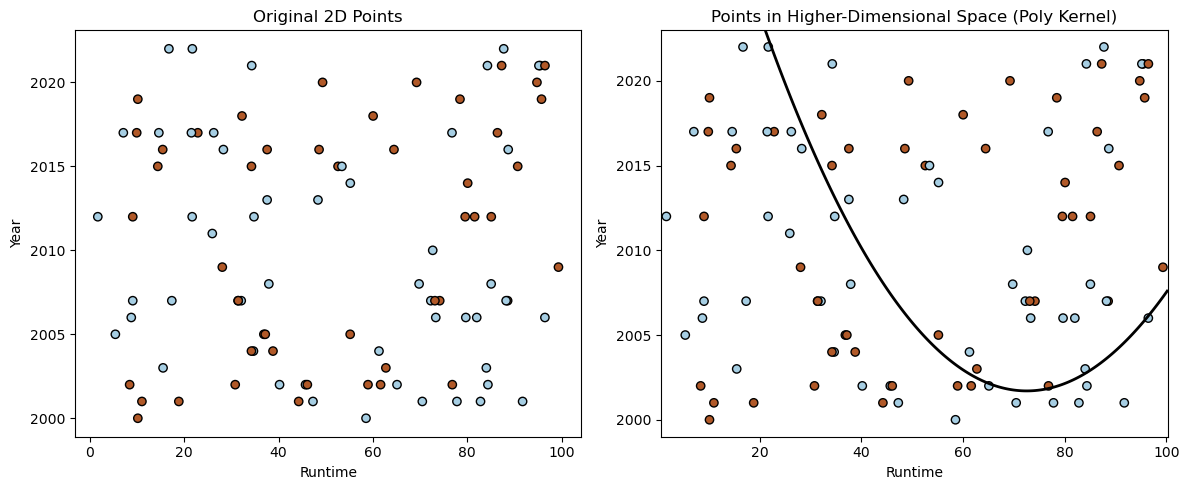

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import pandas as pd

# Assuming you have a DataFrame called data_sub
# For illustration, let's create a sample DataFrame
data_sub = pd.DataFrame({
    'runtime': np.random.rand(100) * 100,
    'year': np.random.randint(2000, 2023, 100),
    'rating': np.random.rand(100) * 10
})

# Select two numeric columns for simplicity
X = data_sub[['runtime', 'year']]

# Use .loc to avoid SettingWithCopyWarning
data_sub['target'] = 0  # Initialize with 0
data_sub.loc[data_sub['rating'] > data_sub['rating'].median(), 'target'] = 1

# Create a synthetic binary target variable for visualization
y = data_sub['target']

# Fit SVM with a polynomial kernel
clf = svm.SVC(kernel='poly', degree=2, coef0=1, gamma=1)
clf.fit(X, y)

# Plot original 2D points
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['runtime'], X['year'], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Original 2D Points')
plt.xlabel('Runtime')
plt.ylabel('Year')

# Plot points in the higher-dimensional space
plt.subplot(1, 2, 2)

# Create a meshgrid to visualize decision boundaries
h = .02
x_min, x_max = X['runtime'].min() - 1, X['runtime'].max() + 1
y_min, y_max = X['year'].min() - 1, X['year'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use decision_function to obtain values in the higher-dimensional space
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(X['runtime'], X['year'], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Points in Higher-Dimensional Space (Poly Kernel)')
plt.xlabel('Runtime')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import spacy

# Sample data (replace this with your actual data)
data = {
    'words_news': ["The quick brown fox jumps over the lazy dog.",
                   "A beautiful sunset on the beach.",
                   "An interesting article about artificial intelligence.",
                   "Coding is essential for data science.",
                   "Healthy eating contributes to overall well-being."],
    'genre': ['News', 'Nature', 'Technology', 'Technology', 'Health']
}

df = pd.DataFrame(data)

# Load spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Text preprocessing
def preprocess_text(text):
    doc = nlp(text)
    selected_words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_.lower() not in stop_words]
    return ' '.join(selected_words)

df['processed_words'] = df['words_news'].apply(preprocess_text)

# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_words'])
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Extract important features
feature_names = vectorizer.get_feature_names_out()
coef_abs = abs(svm_model.coef_.toarray()[0])
important_features = [feature_names[i] for i in coef_abs.argsort()[-5:][::-1]]  # Adjust the number of features as needed

print("Important Features:")
print(important_features)


Accuracy: 0.00%
Important Features:
['well', 'contribute', 'overall', 'healthy', 'eat']


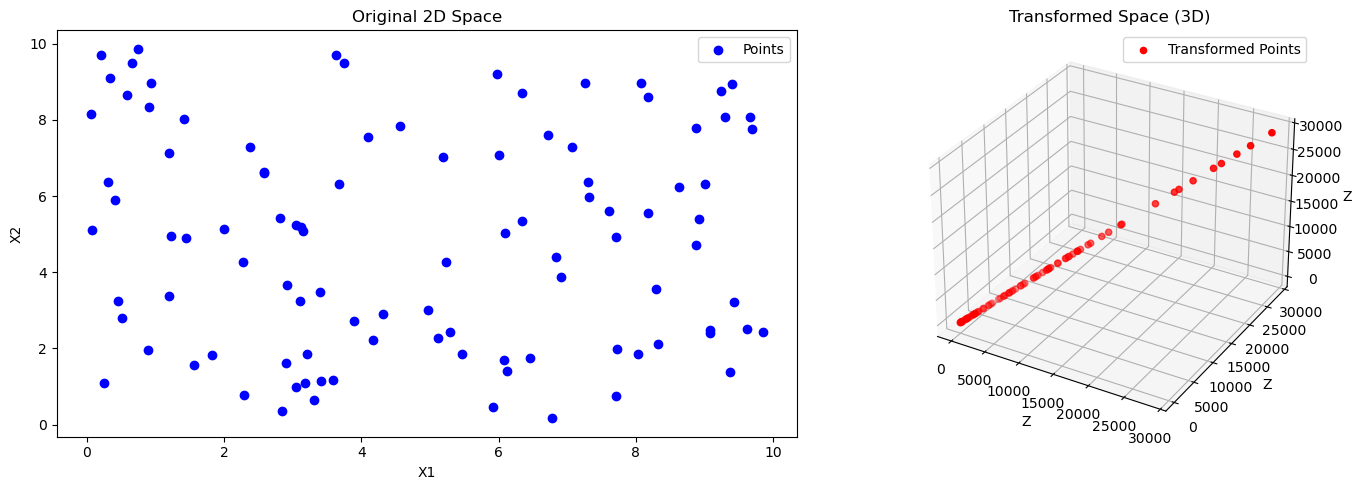

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate 100 random 2D points
np.random.seed(42)
points_2d = np.random.rand(100, 2) * 10  # Random points between 0 and 10

# Polynomial Kernel Function
def polynomial_kernel(x, y, r=1, d=2):
    return (np.dot(x, y) + r)**d

# Transform Points Using Polynomial Kernel
points_transformed = np.array([polynomial_kernel(x, x) for x in points_2d])

# Visualization
fig = plt.figure(figsize=(15, 5))

# Original 2D Space
ax1 = fig.add_subplot(121)
ax1.scatter(points_2d[:, 0], points_2d[:, 1], c='blue', marker='o', label='Points')
ax1.set_title('Original 2D Space')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.legend()

# Transformed Space
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(points_transformed, points_transformed, points_transformed, c='red', marker='o', label='Transformed Points')
ax2.set_title('Transformed Space (3D)')
ax2.set_xlabel('Z')
ax2.set_ylabel('Z')
ax2.set_zlabel('Z')
ax2.legend()

plt.tight_layout()
plt.show()


In [8]:
df= data

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_movies' column
df = df.dropna(subset=['words_movies'])

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_movies'] = df['words_movies'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_movies'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fine-tune the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

# Report Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 97.15%
Classification Report:
                                                                precision    recall  f1-score   support

                                                        Action       0.94      0.99      0.96       883
                          Action, Adventure, Animation, Family       1.00      1.00      1.00         1
                             Action, Adventure, Comedy, Family       0.00      0.00      0.00         1
            Action, Adventure, Comedy, Horror, Science Fiction       1.00      1.00      1.00         2
                                      Action, Adventure, Crime       1.00      1.00      1.00         1
                                      Action, Adventure, Drama       1.00      1.00      1.00         1
                                    Action, Adventure, Fantasy       1.00      0.91      0.95        11
                          Action, Adventure, Fantasy, TV Movie       1.00      1.00      1.00         1
                       

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Prepare the data for SVM
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['words_news'].astype(str))  # Ensure the column is of string type
y = df['genre']  # Assuming 'genre' is a column indicating the genre

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 20.69%
Classification Report:
                                                                        precision    recall  f1-score   support

                                                                Action       0.24      0.71      0.35       855
                                                     Action, Adventure       0.00      0.00      0.00         3
                                  Action, Adventure, Animation, Family       0.00      0.00      0.00         2
                    Action, Adventure, Comedy, Horror, Science Fiction       0.00      0.00      0.00         2
                                              Action, Adventure, Crime       0.00      0.00      0.00         3
                                              Action, Adventure, Drama       0.00      0.00      0.00         1
                                            Action, Adventure, Fantasy       0.00      0.00      0.00         4
                                  Action, Adventure, Fantasy, T

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd

# Assuming df is your DataFrame and 'genre' is the column of interest
df['genre'] = df['genre'].str.split(',').str[0]

df

,title,year,director,actors,rating,runtime,genre,release_date,plot_summary,words_movies,headline,category,short_description,authors,date,words_news
0,The SpongeBob Movie: Sponge Out of Water,2015,"Directors:Paul Tibbitt, Mike Mitchell","Tom Kenny, Antonio Banderas, Bill Fagerbakke, ...",6.0,92,Animation,2/6/2015,When a diabolical pirate above the sea steals ...,diabolical pirate sea steals secret formula ne...,Fighting the New Stupidity,"Keith M. Parsons, ContributorPhilosopher, hist...",Vaccines are a great triumph of the human inte...,Vaccines are a great triumph of the human inte...,2/6/2015,Vaccines great triumph human intellect ancient...
1,Entourage,2015,Doug Ellin,"Adrian Grenier, Kevin Connolly, Jerry Ferrara,...",6.5,104,Comedy,7/18/2015,Film star Vince Chase navigates the vapid terr...,navigates vapid terrain close circle friends t...,Harper Lee's 'Watchmen' Infused With Religious...,"Cathy Lynn Grossman, Religion News Service",(RNS) Harper Lee’s “new” book “Go Set a Watchm...,(RNS) Harper Lee’s “new” book “Go Set a Watchm...,7/18/2015,new book Go infused religious life Christian m...
2,Baywatch,2017,Seth Gordon,"Dwayne Johnson, Zac Efron, Alexandra Daddario,...",5.5,116,Action,5/25/2017,Devoted lifeguard Mitch Buchannon butts heads ...,Devoted lifeguard butts heads brash new recrui...,39 Tweets That Capture How Much Parents Love Wine,Caroline Bologna,Happy National Wine Day!,Happy National Wine Day!,5/25/2017,Happy
3,Mute,2018,Duncan Jones,"Alexander Skarsgård, Paul Rudd, Justin Theroux...",5.4,126,Mystery,2/23/2018,A mute bartender goes up against his city's ga...,mute bartender goes city gangsters effort find...,"Despite Attacking Renewables, Trump Team Says ...",Chris D'Angelo,"""As long as it’s made in America, I’m good wit...","""As long as it’s made in America, I’m good wit...",2/23/2018,As long made ’m good said
4,Honeymoon,2014,Leigh Janiak,"Rose Leslie, Harry Treadaway, Ben Huber, Hanna...",5.7,87,Drama,9/12/2014,A newlywed couple finds their lake-country hon...,newlywed couple finds lake country honeymoon d...,"Golf Teacher Admits To Molesting Kids, Trying ...",Ed Mazza,NaN,NaN,9/12/2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Stree,2018,Amar Kaushik,"Ashish Chhipa, Rajkummar Rao, Shraddha Kapoor,...",7.5,128,Comedy,8/31/2018,"In the small town of Chanderi, the menfolk liv...",small town menfolk live fear evil spirit named...,Iran Continues To Honor Nuclear Deal Pledges D...,WORLD NEWS,The International Atomic Energy Agency said Te...,Dominique Mosbergen,8/31/2018,said cooperating inspectors limiting stockpile...
19996,Creep 2,2017,Patrick Brice,"Karan Soni, Mark Duplass, Desiree Akhavan, Kyl...",6.4,78,Crime,10/24/2017,A video artist looking for work drives to a re...,video artist looking work drives remote house ...,This Is The Trendiest Nail Polish Color For Fall,"PureWow, ContributorWhat your girl crush reads...",We know what you’re thinking: Isn’t orange so ...,We know what you’re thinking: Isn’t orange so ...,10/24/2017,know thinking orange so expected fall florals ...
19997,Hacksaw Ridge,2016,Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",8.1,139,Biography,11/4/2016,World War II American Army Medic Desmond T. Do...,served refuses kill people becomes first man A...,Heather Graham: It Would Be 'Nice' To Have A P...,Zahara Hill,Agreed.,Agreed.,11/4/2016,Agreed
19998,Ready Player One,2018,Steven Spielberg,"Tye Sheridan, Olivia Cooke, Ben Mendelsohn, Le...",7.4,140,Action,3/29/2018,When the creator of a virtual reality called t...,creator virtual reality called dies makes post...,Eric Trump Gets Ravaged On Twitter After His P...,Ed Mazza,"""What is cellmate?""","""What is cellmate?""",3/29/2018,cellmate


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_news'] = df['words_news'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_news'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fine-tune the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

# Report Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\asuri\AppData\Local\Temp\ipykernel_34060\2567815300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_news'] = df['words_news'].apply(preprocess_text)


Accuracy: 24.47%
Classification Report:
                 precision    recall  f1-score   support

         Action       0.28      0.72      0.40      1024
      Adventure       0.00      0.00      0.00       196
      Animation       0.00      0.00      0.00       223
      Biography       0.00      0.00      0.00       214
         Comedy       0.16      0.12      0.14       607
          Crime       0.00      0.00      0.00       184
    Documentary       0.00      0.00      0.00        30
          Drama       0.16      0.14      0.15       615
         Family       0.00      0.00      0.00        75
        Fantasy       0.00      0.00      0.00        36
        History       0.00      0.00      0.00         4
         Horror       0.00      0.00      0.00       202
          Music       0.00      0.00      0.00        11
        Mystery       0.00      0.00      0.00        23
        Romance       0.00      0.00      0.00        31
Science Fiction       0.00      0.00      0.00 

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Sample a fraction of the data to reduce the dataset size
df = df.sample(frac=0.2, random_state=42)

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_news'] = df['words_news'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_news'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced range of C values
param_dist = {'C': [0.01, 0.1, 1, 10]}

# Create the randomized search object with fewer iterations
random_search = RandomizedSearchCV(SVC(kernel='linear', random_state=42),
                                   param_distributions=param_dist, n_iter=2, cv=5)
random_search.fit(X_train, y_train)

# Get the best parameter
best_C = random_search.best_params_['C']
print("Best C:", best_C)

# Train an SVM classifier with the best C value
model = SVC(kernel='linear', C=best_C, random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

# Report Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best C: 1
Accuracy: 20.49%
Classification Report:
                                                               precision    recall  f1-score   support

                                                       Action       0.22      0.79      0.35       167
                                            Action, Adventure       0.00      0.00      0.00         1
                                     Action, Adventure, Drama       0.00      0.00      0.00         1
                                   Action, Adventure, Fantasy       0.00      0.00      0.00         2
                         Action, Adventure, Fantasy, TV Movie       0.00      0.00      0.00         1
                                    Action, Adventure, Horror       0.00      0.00      0.00         1
  Action, Adventure, Science Fiction, Fantasy, Comedy, Horror       0.00      0.00      0.00         1
                  Action, Animation, Fantasy, Science Fiction       0.00      0.00      0.00         1
                      

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Sample a fraction of the data to reduce the dataset size
df = df.sample(frac=0.2, random_state=42)

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_news'] = df['words_news'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_news'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced range of C values for linear kernel
param_dist_linear = {'C': [0.01, 0.1, 1, 10]}

# Create the randomized search object with fewer iterations for linear kernel
random_search_linear = RandomizedSearchCV(SVC(kernel='linear', random_state=42),
                                          param_distributions=param_dist_linear, n_iter=2, cv=5)
random_search_linear.fit(X_train, y_train)

# Get the best parameter for linear kernel
best_C_linear = random_search_linear.best_params_['C']
print("Best C (Linear Kernel):", best_C_linear)

# Train an SVM classifier with the best C value for linear kernel
model_linear = SVC(kernel='linear', C=best_C_linear, random_state=42)
model_linear.fit(X_train, y_train)

# Evaluate the SVM model with linear kernel
y_pred_linear = model_linear.predict(X_test)

# Report Accuracy for linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%")

# Print Classification Report for linear kernel
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

# Define a reduced range of C values for rbf kernel
param_dist_rbf = {'C': [0.01, 0.1, 1, 10],
                  'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}

# Create the randomized search object with fewer iterations for rbf kernel
random_search_rbf = RandomizedSearchCV(SVC(kernel='rbf', random_state=42),
                                       param_distributions=param_dist_rbf, n_iter=5, cv=5)
random_search_rbf.fit(X_train, y_train)

# Get the best parameters for rbf kernel
best_params_rbf = random_search_rbf.best_params_
print("Best Parameters (RBF Kernel):", best_params_rbf)

# Train an SVM classifier with the best parameters for rbf kernel
model_rbf = SVC(kernel='rbf', **best_params_rbf, random_state=42)
model_rbf.fit(X_train, y_train)

# Evaluate the SVM model with rbf kernel
y_pred_rbf = model_rbf.predict(X_test)

# Report Accuracy for rbf kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf * 100:.2f}%")

# Print Classification Report for rbf kernel
print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best C (Linear Kernel): 0.1
Accuracy (Linear Kernel): 24.49%
Classification Report (Linear Kernel):
                                               precision    recall  f1-score   support

                                       Action       0.24      1.00      0.39        36
                            Action, Adventure       0.00      0.00      0.00         1
                    Action, Adventure, Horror       0.00      0.00      0.00         1
                        Action, Comedy, Crime       0.00      0.00      0.00         1
                                Action, Drama       0.00      0.00      0.00         3
                                    Adventure       0.00      0.00      0.00         8
         Adventure, Animation, Comedy, Family       0.00      0.00      0.00         1
                                    Animation       0.00      0.00      0.00         5
         Animation, Family, Adventure, Comedy       0.00      0.00      0.00         1
        Animation, Family, Fa

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\mode

Best Parameters (RBF Kernel): {'gamma': 1, 'C': 0.01}
Accuracy (RBF Kernel): 24.49%
Classification Report (RBF Kernel):
                                               precision    recall  f1-score   support

                                       Action       0.24      1.00      0.39        36
                            Action, Adventure       0.00      0.00      0.00         1
                    Action, Adventure, Horror       0.00      0.00      0.00         1
                        Action, Comedy, Crime       0.00      0.00      0.00         1
                                Action, Drama       0.00      0.00      0.00         3
                                    Adventure       0.00      0.00      0.00         8
         Adventure, Animation, Comedy, Family       0.00      0.00      0.00         1
                                    Animation       0.00      0.00      0.00         5
         Animation, Family, Adventure, Comedy       0.00      0.00      0.00         1
        A

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Sample a fraction of the data to reduce the dataset size
df = df.sample(frac=0.2, random_state=42)

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_news'] = df['words_news'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_news'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced range of C values
param_dist = {'C': [0.01, 0.1, 1, 10],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}

# Create the randomized search object with fewer iterations
random_search = RandomizedSearchCV(SVC(kernel='rbf', random_state=42),
                                   param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train an SVM classifier with the best parameters
model = SVC(kernel='sigmoid', **best_params, random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

# Report Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'gamma': 0.001, 'C': 0.1}
Accuracy: 23.33%
Classification Report:
                                       precision    recall  f1-score   support

                               Action       0.23      1.00      0.38         7
                Action, Comedy, Crime       0.00      0.00      0.00         1
                        Action, Drama       0.00      0.00      0.00         1
                            Adventure       0.00      0.00      0.00         1
                            Animation       0.00      0.00      0.00         3
Animation, Family, Fantasy, Adventure       0.00      0.00      0.00         1
                            Biography       0.00      0.00      0.00         1
                               Comedy       0.00      0.00      0.00         4
                                Crime       0.00      0.00      0.00         1
                                Drama       0.00      0.00      0.00         7
             Horror, Thriller, Action       0.

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Sample a fraction of the data to reduce the dataset size
df = df.sample(frac=0.2, random_state=42)

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_news'] = df['words_news'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_news'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced range of C values
param_dist = {'C': [0.01, 0.1, 1, 10],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}

# Create the randomized search object with fewer iterations
random_search = RandomizedSearchCV(SVC(kernel='poly', random_state=42),
                                   param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train an SVM classifier with the best parameters
model = SVC(kernel='poly', **best_params, random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

# Report Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'gamma': 0.1, 'C': 0.01}
Accuracy: 16.67%
Classification Report:
                         precision    recall  f1-score   support

                 Action       0.00      0.00      0.00         2
                 Comedy       0.00      0.00      0.00         1
                  Drama       0.17      1.00      0.29         1
Horror, Thriller, Drama       0.00      0.00      0.00         1
     Thriller, TV Movie       0.00      0.00      0.00         1

               accuracy                           0.17         6
              macro avg       0.03      0.20      0.06         6
           weighted avg       0.03      0.17      0.05         6



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in 'words_news' column
df = df.dropna(subset=['words_news'])

# Sample a fraction of the data to reduce the dataset size
df = df.sample(frac=0.2, random_state=42)

# Experiment with advanced text preprocessing
def preprocess_text(text):
    # Add your advanced preprocessing steps here
    return text

df['words_news'] = df['words_news'].apply(preprocess_text)

# Experiment with TfidfVectorizer parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X = vectorizer.fit_transform(df['words_news'].astype(str))
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced range of C values
param_dist = {'C': [0.01, 0.1, 1, 10],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}

# Create the randomized search object with fewer iterations
random_search = RandomizedSearchCV(SVC(kernel='rbf', random_state=42),
                                   param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train an SVM classifier with the best parameters
model = SVC(kernel='poly', **best_params, random_state=42)
model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred = model.predict(X_test)

# Report Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


ValueError: max_df corresponds to < documents than min_df

In [ ]:
##NUMERIC




Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


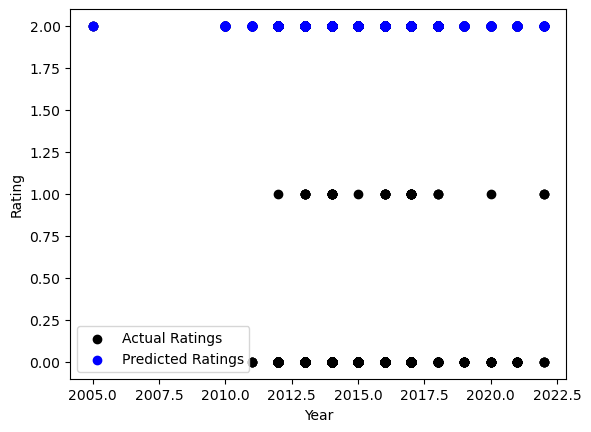

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_sub' is your DataFrame
# Assuming 'year' and 'runtime' are your features, and 'rating' is the target

# Select features and target
X = data_sub[['year', 'runtime']]
y = data_sub['rating']

# Convert 'rating' to categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pd.cut(y, bins=[-float('inf'), 4, 7, float('inf')], labels=['low', 'medium', 'high']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', class_report)

# Plot the predictions against the actual ratings
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred, color='blue', label='Predicted Ratings')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()
plt.show()


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metr

Linear Kernel:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000


RBF Kernel:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



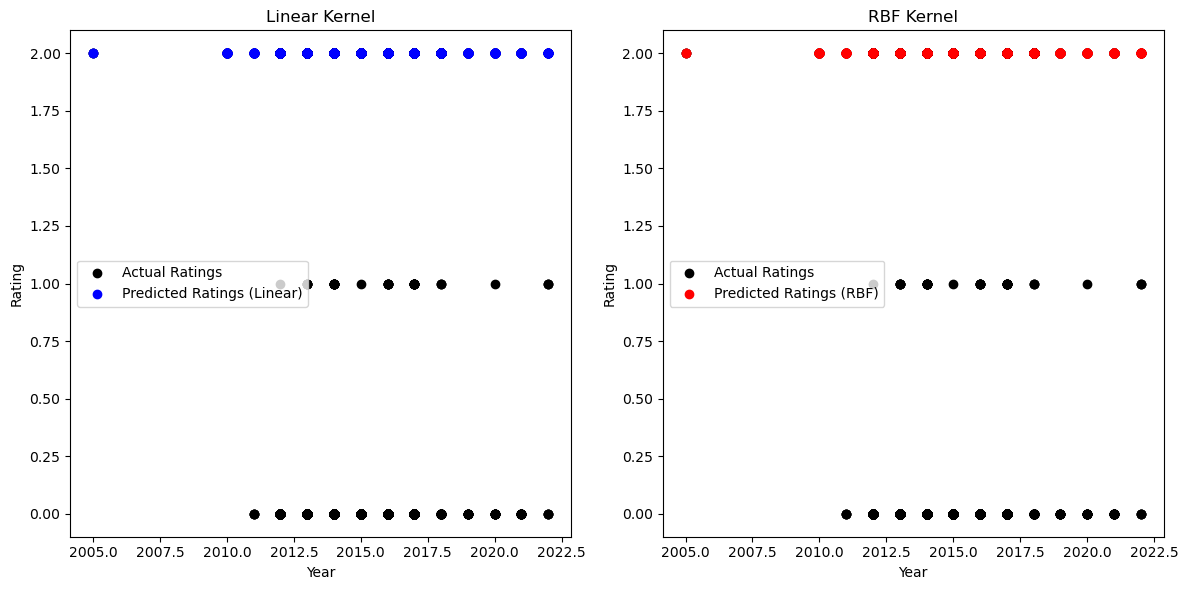

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_sub' is your DataFrame
# Assuming 'year' and 'runtime' are your features, and 'rating' is the target

# Select features and target
X = data_sub[['year', 'runtime']]
y = data_sub['rating']

# Convert 'rating' to categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pd.cut(y, bins=[-float('inf'), 4, 7, float('inf')], labels=['low', 'medium', 'high']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifiers with linear and RBF kernels
linear_model = SVC(kernel='linear')
rbf_model = SVC(kernel='rbf')

# Train the models
linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rbf = rbf_model.predict(X_test)

# Evaluate the linear model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)

# Evaluate the RBF model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
class_report_rbf = classification_report(y_test, y_pred_rbf)

print("Linear Kernel:")
print(f'Accuracy: {accuracy_linear:.2f}')
print('Classification Report:\n', class_report_linear)

print("\nRBF Kernel:")
print(f'Accuracy: {accuracy_rbf:.2f}')
print('Classification Report:\n', class_report_rbf)

# Plot the predictions against the actual ratings for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred_linear, color='blue', label='Predicted Ratings (Linear)')
plt.title('Linear Kernel')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred_rbf, color='red', label='Predicted Ratings (RBF)')
plt.title('RBF Kernel')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
unique_ratings = data_sub['rating'].unique()
print(unique_ratings)


[6.  6.5 5.5 5.4 5.7 7.3 7.4 7.8 7.  6.6 6.8 7.5 5.8 6.2 6.3 7.2 6.4 6.9
 5.2 5.3 4.8 5.6 5.  7.9 3.  4.6 6.7 8.2 8.1 5.9 7.1 7.6 4.9 6.1 8.  4.3
 7.7 8.4 4.1 4.5 8.8 2.8 5.1 8.3 4.4 3.8 1.  4.7 8.5 2.6 8.6 1.9 2.  4.
 3.9 4.2 3.5 1.2 3.3 3.7 3.6 8.9 0.  9.  1.5]


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metr

Linear Kernel:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000


RBF Kernel:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



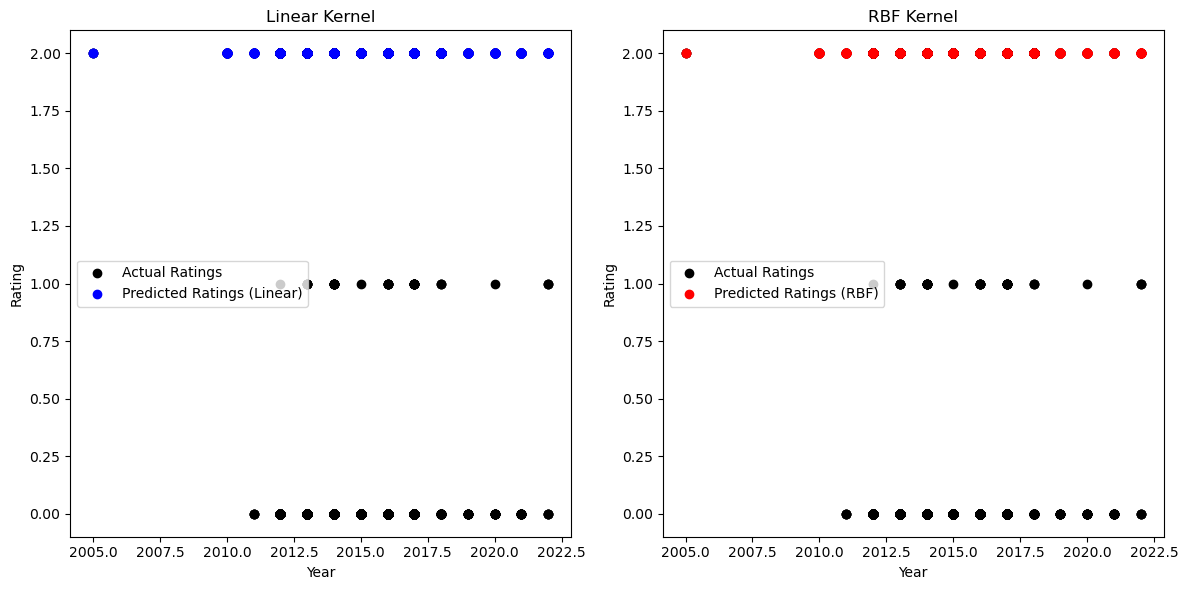

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_sub' is your DataFrame
# Assuming 'year' and 'runtime' are your features, and 'rating' is the target

# Select features and target
X = data_sub[['year', 'runtime']]
y = data_sub['rating']

# Define the bins and labels explicitly
bins = [-float('inf'), 4, 7, float('inf')]
labels = ['low', 'medium', 'high']

# Convert 'rating' to categorical with explicit labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pd.cut(y, bins=bins, labels=labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifiers with linear and RBF kernels
linear_model = SVC(kernel='linear')
rbf_model = SVC(kernel='rbf')

# Train the models
linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rbf = rbf_model.predict(X_test)

# Evaluate the linear model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)

# Evaluate the RBF model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
class_report_rbf = classification_report(y_test, y_pred_rbf)

print("Linear Kernel:")
print(f'Accuracy: {accuracy_linear:.2f}')
print('Classification Report:\n', class_report_linear)

print("\nRBF Kernel:")
print(f'Accuracy: {accuracy_rbf:.2f}')
print('Classification Report:\n', class_report_rbf)

# Plot the predictions against the actual ratings for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred_linear, color='blue', label='Predicted Ratings (Linear)')
plt.title('Linear Kernel')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred_rbf, color='red', label='Predicted Ratings (RBF)')
plt.title('RBF Kernel')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()

plt.tight_layout()
plt.show()


Linear Kernel:
Mean Squared Error: 0.81
R-squared: 0.07

RBF Kernel:
Mean Squared Error: 0.80
R-squared: 0.08


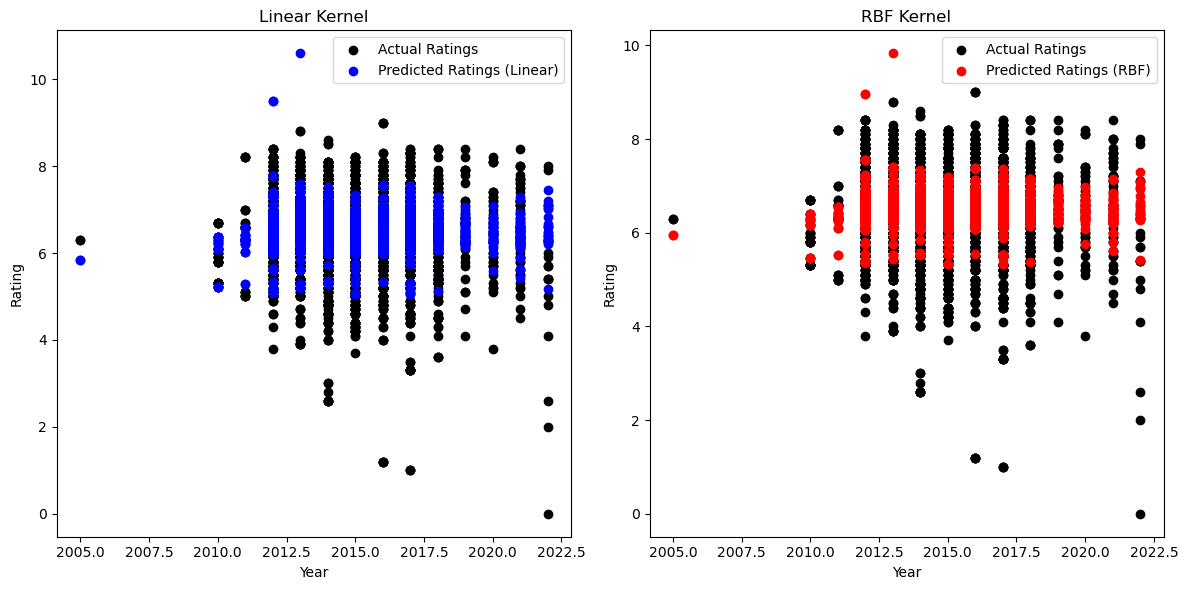

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'data_sub' is your DataFrame
# Assuming 'year' and 'runtime' are your features, and 'rating' is the target

# Select features and target
X = data_sub[['year', 'runtime']]
y = data_sub['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM regressors with linear and RBF kernels
linear_model = SVR(kernel='linear')
rbf_model = SVR(kernel='rbf')

# Train the models
linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rbf = rbf_model.predict(X_test)

# Evaluate the linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate the RBF model
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("Linear Kernel:")
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'R-squared: {r2_linear:.2f}')

print("\nRBF Kernel:")
print(f'Mean Squared Error: {mse_rbf:.2f}')
print(f'R-squared: {r2_rbf:.2f}')

# Plot the predictions against the actual ratings for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred_linear, color='blue', label='Predicted Ratings (Linear)')
plt.title('Linear Kernel')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['year'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['year'], y_pred_rbf, color='red', label='Predicted Ratings (RBF)')
plt.title('RBF Kernel')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()

plt.tight_layout()
plt.show()



Kernel: linear


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


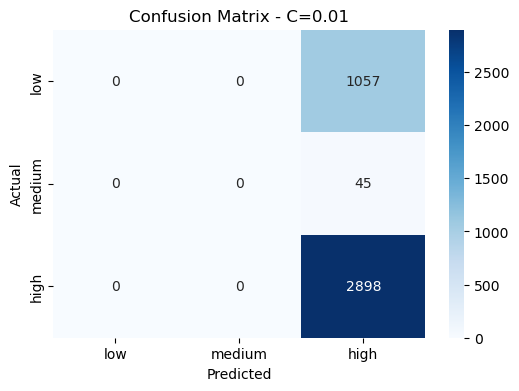


C=0.01:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


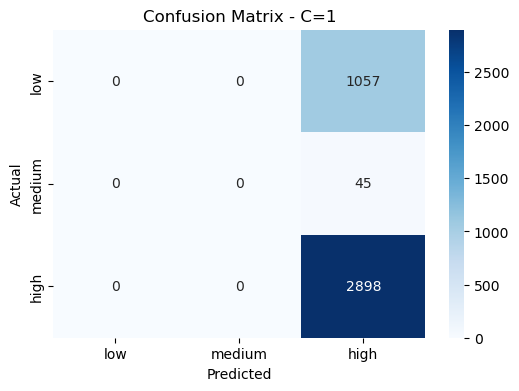


C=1:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


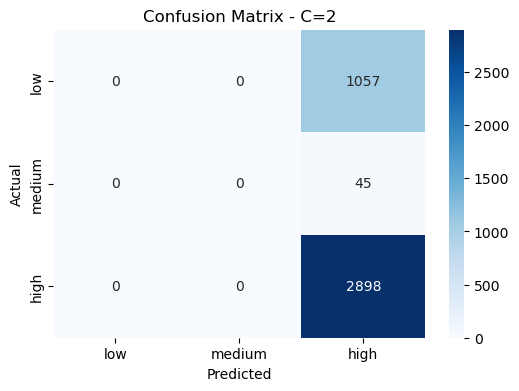


C=2:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000


Kernel: rbf


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


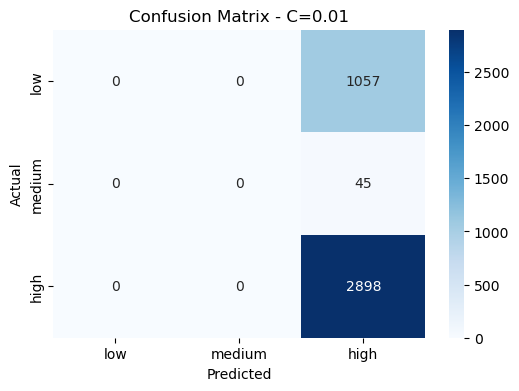


C=0.01:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


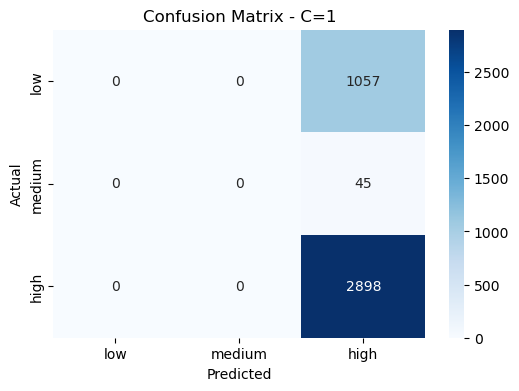


C=1:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


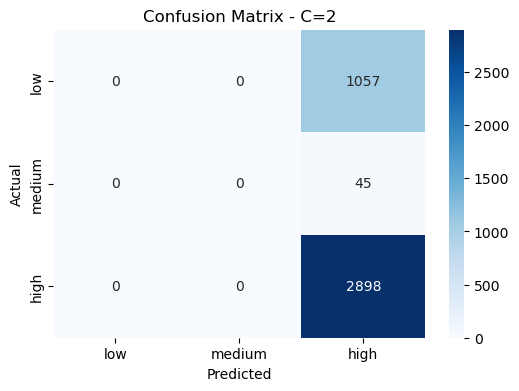


C=2:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000


Kernel: sigmoid


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


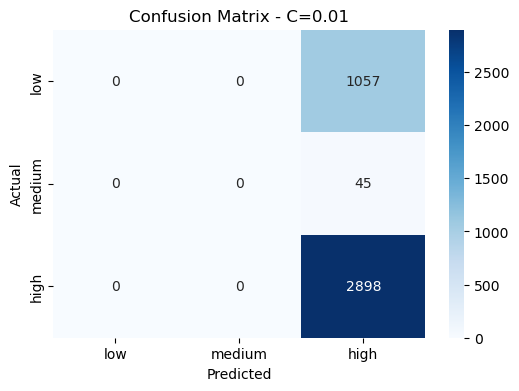


C=0.01:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


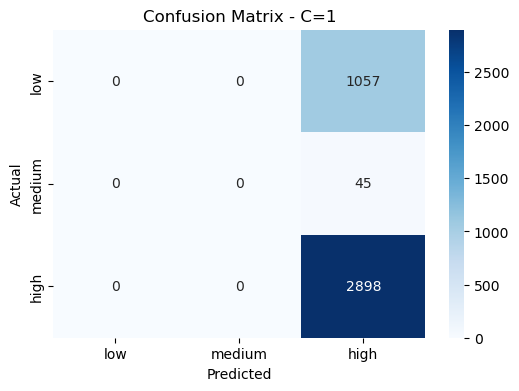


C=1:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


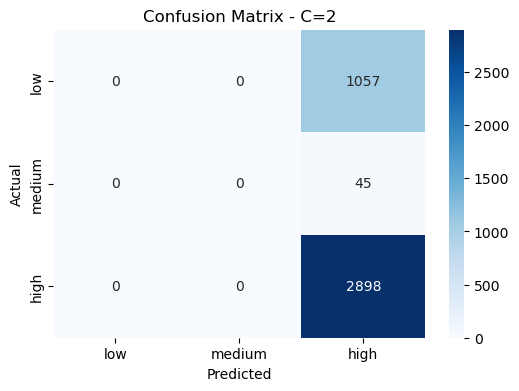


C=2:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.00      0.00      0.00        45
           2       0.72      1.00      0.84      2898

    accuracy                           0.72      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.52      0.72      0.61      4000



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_sub' is your DataFrame
# Assuming 'year' and 'runtime' are your features, and 'rating' is the target

# Select features and target
X = data_sub[['year', 'runtime']]
y = data_sub['rating']

# Define the bins and labels explicitly
bins = [-float('inf'), 4, 7, float('inf')]
labels = ['low', 'medium', 'high']

# Convert 'rating' to categorical with explicit labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pd.cut(y, bins=bins, labels=labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifiers with linear, RBF, and sigmoid kernels
linear_model = SVC(kernel='linear')
rbf_model = SVC(kernel='rbf')
sigmoid_model = SVC(kernel='sigmoid')

# Define different values for C for each kernel
C_values = [0.01, 1, 2]

# Evaluate models for each kernel and C value
for kernel_model in [linear_model, rbf_model, sigmoid_model]:
    print(f"\nKernel: {kernel_model.kernel}")
    for c in C_values:
        # Train the models
        kernel_model.set_params(C=c)
        kernel_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = kernel_model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        # Display confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.title(f"Confusion Matrix - C={c}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        print(f'\nC={c}:')
        print(f'Accuracy: {accuracy:.2f}')
        print('Classification Report:\n', class_report)


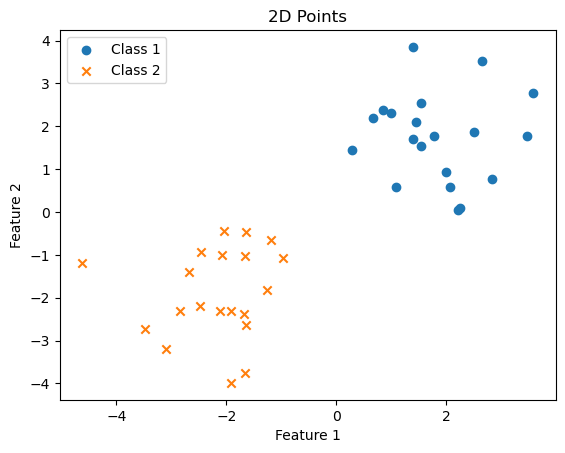

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two classes of points
np.random.seed(42)
class_1 = np.random.randn(20, 2) + [2, 2]
class_2 = np.random.randn(20, 2) - [2, 2]

# Plot the points
plt.scatter(class_1[:, 0], class_1[:, 1], marker='o', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='x', label='Class 2')
plt.title('2D Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


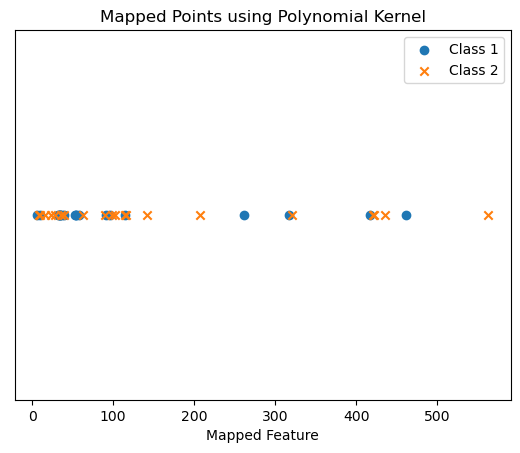

In [22]:
# Define polynomial kernel function
def polynomial_kernel(x, y, r=1, d=2):
    return (np.dot(x, y) + r) ** d

# Apply polynomial kernel to the 2D points
mapped_class_1 = np.array([polynomial_kernel(point, point) for point in class_1])
mapped_class_2 = np.array([polynomial_kernel(point, point) for point in class_2])

# Plot the mapped points
plt.scatter(mapped_class_1, np.zeros_like(mapped_class_1), marker='o', label='Class 1')
plt.scatter(mapped_class_2, np.zeros_like(mapped_class_2), marker='x', label='Class 2')
plt.title('Mapped Points using Polynomial Kernel')
plt.xlabel('Mapped Feature')
plt.yticks([])
plt.legend()
plt.show()


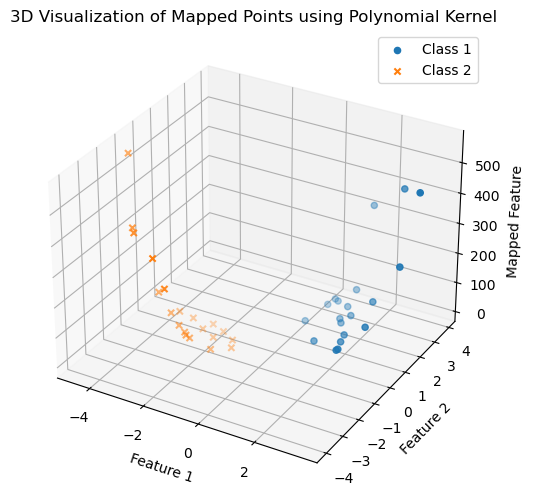

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Define a function to calculate polynomial kernel for 3D visualization
def polynomial_kernel_3d(x, y, r=1, d=2):
    return (np.dot(x, y) + r) ** d

# Apply polynomial kernel to the 2D points for 3D visualization
mapped_class_1_3d = np.array([polynomial_kernel_3d(point, point) for point in class_1])
mapped_class_2_3d = np.array([polynomial_kernel_3d(point, point) for point in class_2])

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class_1[:, 0], class_1[:, 1], mapped_class_1_3d, marker='o', label='Class 1')
ax.scatter(class_2[:, 0], class_2[:, 1], mapped_class_2_3d, marker='x', label='Class 2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Mapped Feature')
ax.set_title('3D Visualization of Mapped Points using Polynomial Kernel')
ax.legend()
plt.show()
